<a href="https://colab.research.google.com/github/poddardelhi/finland_train_eda/blob/main/finland_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('finland-train')
jovian.set_colab_id('1dvIeWT_wqfFn2FtxhWW9Zv6hoWoRBtSw')

     |████████████████████████████████| 71kB 3.5MB/s 


#Finland Train Data


In [150]:
# Execute this to save new versions of the notebook
jovian.commit(project="finland-train")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/poddardelhi/finland-train


'https://jovian.ai/poddardelhi/finland-train'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np 
import pandas as pd 
import datetime as dtm
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

## Loading the CSV file

In [6]:
data= pd.read_csv("/content/drive/MyDrive/Jovian/solita_training/train-27-data-2020-01-01_to_2020-02-29.csv")

## Creating database (second way)

In [7]:
db = sqlalchemy.create_engine('sqlite:///timeseries.db')

In [8]:
data.to_sql('timeseries',db,if_exists="replace")

##EDA

In [9]:
data.head()

,cancelled,commuterLineID,departureDate,operatorShortCode,operatorUICCode,runningCurrently,timetableAcceptanceDate,timetableType,trainCategory,trainNumber,trainType,version,timeTableRows_actualTime,timeTableRows_cancelled,timeTableRows_causes,timeTableRows_commercialStop,timeTableRows_commercialTrack,timeTableRows_countryCode,timeTableRows_differenceInMinutes,timeTableRows_estimateSource,timeTableRows_liveEstimateTime,timeTableRows_scheduledTime,timeTableRows_stationShortCode,timeTableRows_stationUICCode,timeTableRows_trainReady,timeTableRows_trainReady_accepted,timeTableRows_trainReady_source,timeTableRows_trainReady_timestamp,timeTableRows_trainStopping,timeTableRows_type
0,False,NaN,2020-01-01,vr,10,False,2019-11-08T10:34:22.000Z,REGULAR,Long-distance,27,IC,266086366790,2020-01-01T12:24:58.000Z,False,[],True,7.0,FI,1,NaN,NaN,2020-01-01T12:24:00.000Z,HKI,1,NaN,True,KUPLA,2020-01-01T12:23:16.000Z,True,DEPARTURE
1,False,NaN,2020-01-01,vr,10,False,2019-11-08T10:34:22.000Z,REGULAR,Long-distance,27,IC,266086366790,2020-01-01T12:30:53.000Z,False,[],True,3.0,FI,2,NaN,NaN,2020-01-01T12:29:00.000Z,PSL,10,NaN,NaN,NaN,NaN,True,ARRIVAL
2,False,NaN,2020-01-01,vr,10,False,2019-11-08T10:34:22.000Z,REGULAR,Long-distance,27,IC,266086366790,2020-01-01T12:32:34.000Z,False,[],True,3.0,FI,3,NaN,NaN,2020-01-01T12:30:00.000Z,PSL,10,NaN,NaN,NaN,NaN,True,DEPARTURE
3,False,NaN,2020-01-01,vr,10,False,2019-11-08T10:34:22.000Z,REGULAR,Long-distance,27,IC,266086366790,2020-01-01T12:34:44.000Z,False,[],NaN,NaN,FI,3,NaN,NaN,2020-01-01T12:32:00.000Z,KÄP,977,NaN,NaN,NaN,NaN,False,ARRIVAL
4,False,NaN,2020-01-01,vr,10,False,2019-11-08T10:34:22.000Z,REGULAR,Long-distance,27,IC,266086366790,2020-01-01T12:34:44.000Z,False,[],NaN,NaN,FI,3,NaN,NaN,2020-01-01T12:32:00.000Z,KÄP,977,NaN,NaN,NaN,NaN,False,DEPARTURE


In [10]:
data.isna().sum()

cancelled                                 0
commuterLineID                        12120
departureDate                             0
operatorShortCode                         0
operatorUICCode                           0
runningCurrently                          0
timetableAcceptanceDate                   0
timetableType                             0
trainCategory                             0
trainNumber                               0
trainType                                 0
version                                   0
timeTableRows_actualTime                264
timeTableRows_cancelled                   0
timeTableRows_causes                      0
timeTableRows_commercialStop          11160
timeTableRows_commercialTrack          8848
timeTableRows_countryCode                 0
timeTableRows_differenceInMinutes         0
timeTableRows_estimateSource          11810
timeTableRows_liveEstimateTime        11810
timeTableRows_scheduledTime               0
timeTableRows_stationShortCode  

In [131]:
df=data.drop(['timeTableRows_trainReady_timestamp','timeTableRows_trainReady_source','timeTableRows_trainReady_accepted','trainCategory','commuterLineID','operatorShortCode','operatorUICCode','runningCurrently','timetableAcceptanceDate','timetableType','version','timeTableRows_cancelled','timeTableRows_causes','timeTableRows_commercialStop','timeTableRows_commercialTrack','timeTableRows_countryCode','timeTableRows_differenceInMinutes','timeTableRows_estimateSource','timeTableRows_liveEstimateTime','timeTableRows_stationUICCode','timeTableRows_trainReady','timeTableRows_trainReady'],axis=1)

In [132]:
df.head()

,cancelled,departureDate,trainNumber,trainType,timeTableRows_actualTime,timeTableRows_scheduledTime,timeTableRows_stationShortCode,timeTableRows_trainStopping,timeTableRows_type
0,False,2020-01-01,27,IC,2020-01-01T12:24:58.000Z,2020-01-01T12:24:00.000Z,HKI,True,DEPARTURE
1,False,2020-01-01,27,IC,2020-01-01T12:30:53.000Z,2020-01-01T12:29:00.000Z,PSL,True,ARRIVAL
2,False,2020-01-01,27,IC,2020-01-01T12:32:34.000Z,2020-01-01T12:30:00.000Z,PSL,True,DEPARTURE
3,False,2020-01-01,27,IC,2020-01-01T12:34:44.000Z,2020-01-01T12:32:00.000Z,KÄP,False,ARRIVAL
4,False,2020-01-01,27,IC,2020-01-01T12:34:44.000Z,2020-01-01T12:32:00.000Z,KÄP,False,DEPARTURE


In [133]:
df.isna().sum()

cancelled                           0
departureDate                       0
trainNumber                         0
trainType                           0
timeTableRows_actualTime          264
timeTableRows_scheduledTime         0
timeTableRows_stationShortCode      0
timeTableRows_trainStopping         0
timeTableRows_type                  0
dtype: int64

In [134]:
df.dropna(axis=0, inplace=True)

In [135]:
df.isna().sum()

cancelled                         0
departureDate                     0
trainNumber                       0
trainType                         0
timeTableRows_actualTime          0
timeTableRows_scheduledTime       0
timeTableRows_stationShortCode    0
timeTableRows_trainStopping       0
timeTableRows_type                0
dtype: int64

In [136]:
df.dtypes

cancelled                           bool
departureDate                     object
trainNumber                        int64
trainType                         object
timeTableRows_actualTime          object
timeTableRows_scheduledTime       object
timeTableRows_stationShortCode    object
timeTableRows_trainStopping         bool
timeTableRows_type                object
dtype: object

## Selecting the only rows where the station code is  TPE and Train was not cancelled

In [137]:
df_TPE= df.loc[(df['timeTableRows_stationShortCode']=='TPE') &(df['cancelled']==False)&(df['timeTableRows_type']=='ARRIVAL')]
df_TPE.reset_index(drop=True)

,cancelled,departureDate,trainNumber,trainType,timeTableRows_actualTime,timeTableRows_scheduledTime,timeTableRows_stationShortCode,timeTableRows_trainStopping,timeTableRows_type
0,False,2020-01-01,27,IC,2020-01-01T13:57:01.000Z,2020-01-01T13:58:00.000Z,TPE,True,ARRIVAL
1,False,2020-01-02,27,IC,2020-01-02T14:04:54.000Z,2020-01-02T13:58:00.000Z,TPE,True,ARRIVAL
2,False,2020-01-03,27,IC,2020-01-03T13:57:10.000Z,2020-01-03T13:58:00.000Z,TPE,True,ARRIVAL
3,False,2020-01-04,27,IC,2020-01-04T14:06:17.000Z,2020-01-04T13:58:00.000Z,TPE,True,ARRIVAL
4,False,2020-01-05,27,IC,2020-01-05T13:56:47.000Z,2020-01-05T13:58:00.000Z,TPE,True,ARRIVAL
5,False,2020-01-06,27,IC,2020-01-06T13:58:06.000Z,2020-01-06T13:58:00.000Z,TPE,True,ARRIVAL
6,False,2020-01-07,27,IC,2020-01-07T13:55:45.000Z,2020-01-07T13:58:00.000Z,TPE,True,ARRIVAL
7,False,2020-01-08,27,IC,2020-01-08T13:56:33.000Z,2020-01-08T13:58:00.000Z,TPE,True,ARRIVAL
8,False,2020-01-09,27,IC,2020-01-09T13:56:02.000Z,2020-01-09T13:58:00.000Z,TPE,True,ARRIVAL
9,False,2020-01-10,27,IC,2020-01-10T13:55:36.000Z,2020-01-10T13:58:00.000Z,TPE,True,ARRIVAL


## Separating Date and Time

In [138]:
df_TPE['timeTableRows_actualTime']=pd.to_datetime(df_TPE['timeTableRows_actualTime'])
df_TPE['timeTableRows_scheduledTime']=pd.to_datetime(df_TPE['timeTableRows_scheduledTime'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
df_TPE.dtypes

cancelled                                        bool
departureDate                                  object
trainNumber                                     int64
trainType                                      object
timeTableRows_actualTime          datetime64[ns, UTC]
timeTableRows_scheduledTime       datetime64[ns, UTC]
timeTableRows_stationShortCode                 object
timeTableRows_trainStopping                      bool
timeTableRows_type                             object
dtype: object

In [140]:
df_TPE['arrivalDate']= df_TPE['timeTableRows_actualTime'].apply(lambda x:x.date().strftime('%d/%m/%y'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
df_TPE['arrivalTime']=df_TPE['timeTableRows_actualTime'].apply(lambda x:x.strftime('%H:%M'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
df_TPE['scheduledDate']= df_TPE['timeTableRows_scheduledTime'].apply(lambda x:x.date().strftime('%d/%m/%y'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_TPE['scheduledTime']=df_TPE['timeTableRows_scheduledTime'].apply(lambda x:x.strftime('%H:%M'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_TPE.head()

,cancelled,departureDate,trainNumber,trainType,timeTableRows_actualTime,timeTableRows_scheduledTime,timeTableRows_stationShortCode,timeTableRows_trainStopping,timeTableRows_type,arrivalDate,arrivalTime,scheduledDate,scheduledTime
89,False,2020-01-01,27,IC,2020-01-01 13:57:01+00:00,2020-01-01 13:58:00+00:00,TPE,True,ARRIVAL,01/01/20,13:57,01/01/20,13:58
291,False,2020-01-02,27,IC,2020-01-02 14:04:54+00:00,2020-01-02 13:58:00+00:00,TPE,True,ARRIVAL,02/01/20,14:04,02/01/20,13:58
493,False,2020-01-03,27,IC,2020-01-03 13:57:10+00:00,2020-01-03 13:58:00+00:00,TPE,True,ARRIVAL,03/01/20,13:57,03/01/20,13:58
695,False,2020-01-04,27,IC,2020-01-04 14:06:17+00:00,2020-01-04 13:58:00+00:00,TPE,True,ARRIVAL,04/01/20,14:06,04/01/20,13:58
897,False,2020-01-05,27,IC,2020-01-05 13:56:47+00:00,2020-01-05 13:58:00+00:00,TPE,True,ARRIVAL,05/01/20,13:56,05/01/20,13:58


In [145]:
df_TPE_clean=df_TPE.copy()
df_TPE_clean=df_TPE_clean.drop(['scheduledDate','scheduledTime','cancelled','departureDate','trainNumber','trainType','timeTableRows_actualTime','timeTableRows_scheduledTime','timeTableRows_stationShortCode','timeTableRows_trainStopping','timeTableRows_type'],axis=1)
df_TPE_clean.reset_index(drop=True)
df_TPE_clean.head()

,arrivalDate,arrivalTime
89,01/01/20,13:57
291,02/01/20,14:04
493,03/01/20,13:57
695,04/01/20,14:06
897,05/01/20,13:56


## Adding DayOfWeek column into the dataframe as commuter is looking for train on Thursday.

In [146]:
df_TPE_clean.dtypes

arrivalDate    object
arrivalTime    object
dtype: object

In [147]:
df_TPE_clean['arrivalDate']=pd.to_datetime(df_TPE_clean['arrivalDate'])
df_TPE_clean['arrivalTime']=pd.to_datetime(df_TPE_clean['arrivalTime']).dt.time
df_TPE_clean['dayOfWeek']=df_TPE_clean['arrivalDate'].dt.day_name()
df_TPE_clean.head()


,arrivalDate,arrivalTime,dayOfWeek
89,2020-01-01,13:57:00,Wednesday
291,2020-02-01,14:04:00,Saturday
493,2020-03-01,13:57:00,Sunday
695,2020-04-01,14:06:00,Wednesday
897,2020-05-01,13:56:00,Friday


In [148]:
df_TPE_clean.dtypes

arrivalDate    datetime64[ns]
arrivalTime            object
dayOfWeek              object
dtype: object

In [149]:
#Taking data of only Thursday
df_thur= df_TPE_clean.loc[(df_TPE_clean['dayOfWeek']=='Thursday')]
df_thur


,arrivalDate,arrivalTime,dayOfWeek
1907,2020-10-01,13:55:00,Thursday
3119,2020-01-16,13:57:00,Thursday
4533,2020-01-23,14:04:00,Thursday
5947,2020-01-30,14:01:00,Thursday
6351,2020-01-02,14:02:00,Thursday
6957,2020-04-02,13:55:00,Thursday
7563,2020-07-02,14:03:00,Thursday
8775,2020-02-13,13:59:00,Thursday
10189,2020-02-20,13:59:00,Thursday
11603,2020-02-27,13:57:00,Thursday


In [80]:
df_thur.dtypes

arrivalDate    datetime64[ns]
arrivalTime            object
dayOfWeek              object
dtype: object

## Mean value of arrival time of train at Tampere station

In [88]:
'''
def avg_time(times):
    avg = 0
    for elem in times:
        avg += elem.dt.second + 60*elem.dt.minute + 3600*elem.dt.hour
    avg /= len(times)
    rez = str(avg/3600) + ' ' + str((avg%3600)/60) + ' ' + str(avg%60)
    return dtm.datetime.strptime(rez, "%H %M %S")
    '''

In [98]:
#First converting the pandas.Series to datetime inorder to compute the mean
df_thur['arrivalTime']=pd.to_datetime(df_thur.arrivalTime, format='%H:%M:%S');


#hours=  pd.DataFrame({'time': [pd.to_datetime(df_thur['arrivalTime'])]})
#%timeit pd.to_timedelta(int((mean.hour*3600+mean.minute*60+mean.second).mean()),unit='s')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
avg = df_thur['arrivalTime']
mean_of_hours= pd.to_timedelta(int((avg.dt.hour *3600 + avg.dt.minute*60+avg.dt.second).mean()),unit='s')
print("\n The average of Arrival time of train at Tampere station is {}".format(mean_of_hours))


 The average of Arrival time of train at Tampere station is 0 days 13:59:12


***The above finding rules out, if the person is planning to reach Tampere at 1600 then he/she has to leave quite early, Additionally, the person will also end up waiting at Tampere due to early arrival***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


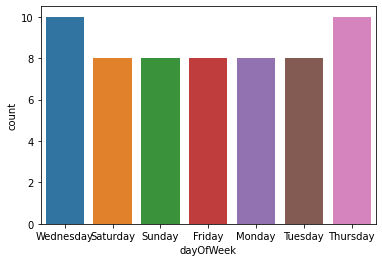

In [116]:
sns.countplot(df_TPE_clean['dayOfWeek']);

**The above plot shows that there were more train arrival on Wednesdays and Thursdays at Tampere station**




## Checking unique observations of Days, Month

In [119]:
df_TPE_clean.head()

,arrivalDate,arrivalTime,dayOfWeek
89,2020-01-01,13:57:00,Wednesday
291,2020-02-01,14:04:00,Saturday
493,2020-03-01,13:57:00,Sunday
695,2020-04-01,14:06:00,Wednesday
897,2020-05-01,13:56:00,Friday


In [124]:
try:
  df_TPE_clean['month']=df_TPE_clean.arrivalDate.dt.month
  df_TPE_clean['day']=df_TPE_clean.arrivalDate.dt.day
  df_TPE_clean['year']= df_TPE_clean.arrivalDate.dt.year
except:
  print("new columns are created")
df_TPE_clean.head()

,arrivalDate,arrivalTime,dayOfWeek,month,day,year
89,2020-01-01,13:57:00,Wednesday,1,1,2020
291,2020-02-01,14:04:00,Saturday,2,1,2020
493,2020-03-01,13:57:00,Sunday,3,1,2020
695,2020-04-01,14:06:00,Wednesday,4,1,2020
897,2020-05-01,13:56:00,Friday,5,1,2020


In [126]:
print("Days of observation   : ",sorted(df_TPE_clean['day'].unique()))
print("Days of observation   : ",sorted(df_TPE_clean['month'].unique()))

Days of observation   :  [1, 2, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Days of observation   :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


**The above result shows that not everyday the train run to station Tampere as there is no data between** *3-12* days

## Frequency of train Month v/s Days in month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


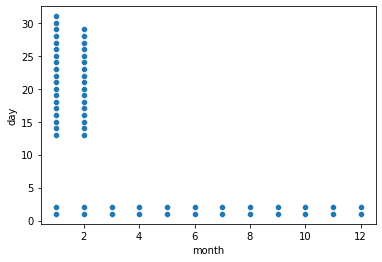

In [129]:
sns.scatterplot(df_TPE_clean['month'],df_TPE_clean['day']);

**The above plot shows that not all days inside the month train was running to Tampere**

## Question  
If there is time, write down in a few sentences how otherwise the open data provided by
the Finnish Transport Agency could be used to promote to bring business value: what are
the possibilities to use the data, what is good about it and what could be the problems?

1.  Finnish Transport Agency open data can be used in many businesses form; a data engine tool can be built using the machine learning model which could bring out the prediction model if the train will be late or not. All possible models can be built defining the business objectives around the data.
2. This data will also be helpful in planning the trains --> for e.g. through this data, Finnish Tramsport agency can check the demand and supply ratio, meaning if particular routes need more trains or not.
2. In above plots we saw that there were trains missing on many days in the month. It would be nice to analyze the demands of these trains by demand requests.  
3. Additionally, the system can be moved to cloud analytics, and through this they can receive alerts on trains being late than some threshold which will also help them to take immediate actions.
. The Swagger tool has very minimum end point testing --> for e.g. if I want 
to extract the data from *start_date* to *end_date*. There is no possiblity as such.
3. Addition to this, the documentation provided inside insn't so informative.